# 0.Installing and importing dependencies

In [12]:
!pip install opencv-python matplotlib imageio gdown tensorflow

#opencv - preprocesses data
#matplotlib - renders results (visualizes)
#imageio - creates gifs from numpy arrays
#gdown - downloads dataset
#tensorflow - builds deep neural network

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

#importing important libraries

In [15]:
#physical_devices = tf.config.list.physical_devices('CPU')
#try:
#    tf.config.experimental.set_memory_growth(physical_devices[0],True)
#except:
#    pass

# 1.Build Data Loading Functions

In [18]:
import gdown

In [19]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=f1a9cb41-388a-4c5e-8451-a6a3787ea918
To: C:\Users\Alind\data.zip
100%|███████████████████████████████████████████████████████████████████████████████| 423M/423M [01:31<00:00, 4.64MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [2]:
def load_video(path:str) -> List[float]: #function load_video takes data path as input and outputs a list of floats to represent our video

    cap = cv2.VideoCapture(path) #we create a video capture instance with path as input argument
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): #we loop through video frames and store each frame in the declared array called frames
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame) #convert from rgb to grayscale so that we have less data to preprocess
        frames.append(frame[190:236,80:220,:]) #isolate lip region using static slicing (original lipnet paper uses DLib)
    cap.release()
    
    mean = tf.math.reduce_mean(frames) #calculate mean
    std = tf.math.reduce_std(tf.cast(frames, tf.float32)) #calculate standard deviation
    return tf.cast((frames - mean), tf.float32) / std #standardize/scale our image features

In [3]:
#decalaring every single character that we might encounter
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [4]:
vocab


['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [5]:
# we can use keras string lookup function to convert char to nums and nums to char
# allows to convert our text and numbers to encodings

char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="") #outofvalue token "oov" returns empty string
#if it encounters a token that is not in the vocabulary
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)


The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [6]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [6]:
char_to_num(['n','i','c','k'])


<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11], dtype=int64)>

In [7]:
num_to_char([14,  9,  3, 11]) #returns a byte encoded value

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [8]:
# defining a function to load up our alignments

def load_alignments(path:str) -> List[str]: #takes path of alignment as input
    with open(path, 'r') as f: #reads path and splits each one of the lines and if the line contains - 'sil' we ignore that line
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]] #appending into an array called tokens
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:] #converting from characters to numbers

In [9]:
#we need to load alignments and videos simultaneously
#extract both paths and return preprocessed videos and preprocessed alignments together
#for this we need a load_data function
def load_data(path: str): #takes path of video 
    path = bytes.decode(path.numpy())
    #file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    #using load_video and load_alignments functions we return frames and alignments
    return frames, alignments

In [10]:
test_path = '.\\data\\s1\\bbal6n.mpg'

In [11]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0] #grabbing file name

'bbal6n'

In [12]:
frames, alignments = load_data(tf.convert_to_tensor(test_path)) #returns preprocessed videos and alignments
#output is 75 frames in length 46x140 pixels across 1 channel

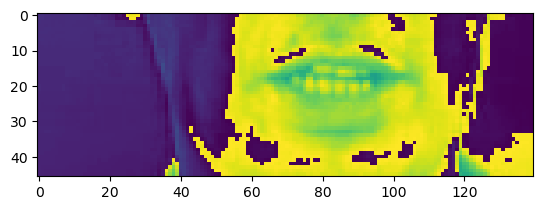

In [13]:
plt.imshow(frames[40])

In [14]:
alignments #output is the word representation of whatever is being said


<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23], dtype=int64)>

In [15]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()]) #prints result of transforming our alignments

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [16]:
def mappable_function(path:str) ->List[str]: #if you want to use a pure string processing you have to wrap is around a tf.py function
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2.Create Data Pipeline

In [17]:
#why do we need to build a data pipeline? -
#this will be used to train the deep learing model this will be used by the tensorflow model to select random samples from our dataset in order to complete 1 training epoch
#we also need to look at the data to ensure that our transformations have worked successfully


In [18]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')  #creating dataset - goes inside data folder -> goes inside s1 folder and looks for anything with a .mpg format
data = data.shuffle(500, reshuffle_each_iteration=False) #shuffling with cache size set to 500 (grabs first 500 and shuffles those)
data = data.map(mappable_function)#returns usable data instead of path
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40])) #batches of 2 (2 sets of videos and 2 sets of alignments)
#75 frames with no image padding and 40 tokens for each alignment if token no. < 40 then padding of 0 will be added
data = data.prefetch(tf.data.AUTOTUNE) #prefetching data (preloading)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [19]:
frames, alignments = data.as_numpy_iterator().next()

In [20]:
len(frames)

2

In [21]:
frames


array([[[[[1.266676  ],
          [1.266676  ],
          [1.266676  ],
          ...,
          [9.276539  ],
          [0.07451035],
          [0.07451035]],

         [[1.266676  ],
          [1.266676  ],
          [1.266676  ],
          ...,
          [9.351049  ],
          [0.07451035],
          [0.        ]],

         [[1.3039311 ],
          [1.3039311 ],
          [1.3039311 ],
          ...,
          [0.07451035],
          [0.03725518],
          [0.03725518]],

         ...,

         [[0.8941242 ],
          [0.8941242 ],
          [0.8941242 ],
          ...,
          [9.351049  ],
          [9.351049  ],
          [9.351049  ]],

         [[0.8941242 ],
          [0.8941242 ],
          [0.8941242 ],
          ...,
          [9.351049  ],
          [9.313794  ],
          [9.313794  ]],

         [[0.8941242 ],
          [0.8941242 ],
          [0.8941242 ],
          ...,
          [9.351049  ],
          [9.313794  ],
          [9.313794  ]]],


        [[[1.3039

In [22]:
alignments

array([[16, 12,  1,  3,  5, 39,  7, 18,  5,  5, 14, 39, 23,  9, 20,  8,
        39,  5, 39, 19,  9, 24, 39, 14, 15, 23,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [16, 12,  1,  3,  5, 39, 18,  5,  4, 39,  1, 20, 39, 24, 39, 26,
         5, 18, 15, 39, 16, 12,  5,  1, 19,  5,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [23]:
sample = data.as_numpy_iterator()

In [24]:
val = sample.next(); val[0] #returns frames

array([[[[[1.446853  ],
          [1.3355566 ],
          [1.4097542 ],
          ...,
          [0.25969157],
          [0.33388916],
          [0.33388916]],

         [[1.4839518 ],
          [1.3355566 ],
          [1.4097542 ],
          ...,
          [0.25969157],
          [0.33388916],
          [0.33388916]],

         [[1.446853  ],
          [1.446853  ],
          [1.446853  ],
          ...,
          [0.33388916],
          [0.33388916],
          [0.33388916]],

         ...,

         [[1.0016675 ],
          [1.0016675 ],
          [0.9645687 ],
          ...,
          [0.07419759],
          [0.07419759],
          [0.07419759]],

         [[1.0016675 ],
          [1.0016675 ],
          [0.9645687 ],
          ...,
          [0.07419759],
          [0.07419759],
          [0.07419759]],

         [[1.0016675 ],
          [1.0016675 ],
          [0.9645687 ],
          ...,
          [0.07419759],
          [0.07419759],
          [0.0370988 ]]],


        [[[1.3726

In [25]:
imageio.mimsave('./animation.gif', val[0][0], fps=10) #creates a gif of frames extracted

Lossy conversion from float32 to uint8. Range [0.0, 9.460192680358887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.460192680358887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.460192680358887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.460192680358887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.460192680358887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.460192680358887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.460192680358887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. R

Lossy conversion from float32 to uint8. Range [0.0, 9.460192680358887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.460192680358887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.460192680358887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.460192680358887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.460192680358887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.460192680358887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.460192680358887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. R

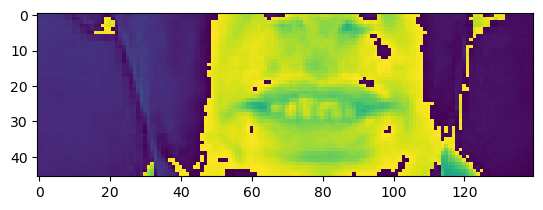

In [26]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][35])

In [27]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]]) #fetching alignment

<tf.Tensor: shape=(), dtype=string, numpy=b'place blue with p seven soon'>

# 3. Design the Deep Neural Network

In [40]:
#we'll be using 3d convolution layers to parse the videos and then we'll condense it down to a classification dense layer which predicts characters
#we'll be using CTC loss function to handle this output (Connectionist Temporal Classification) - used when we have word transcriptions that are'nt specifically aligned to frames
# ctc reduces duplicates using a token

In [28]:
# importing dependencies
from tensorflow.keras.models import Sequential #importing sequential model class (linear stack of layers)
#importing layers
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
#importing optimizer
from tensorflow.keras.optimizers.legacy import Adam
#used to save model at specific number of epochs
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [29]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [30]:
model = Sequential() #instantiating model
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2))) #conv layer with relu activation function along with a maxpool layer

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2))) #same thing with 256 conv units

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2))) #same thing with 75 conv units

model.add(TimeDistributed(Flatten())) #allows input of 75 units into our lstm so eventually we'll be able to output 75 units out of our lstm

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5)) #2 lstm layers with a dropout of 50% of units (regularization)

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax')) #dense layer

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128   3584      
                             )                                   
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128   0         
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 75, 23, 70, 128)   0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                        

In [32]:
yhat = model.predict(val[0])

1/1 [==============================] - 3s 3s/step


In [33]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'yyyy88888888888888888888888888888888888888888888888888888888888888888888888'>

In [34]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])
#initial check on model output

<tf.Tensor: shape=(), dtype=string, numpy=b'yyyy88888888888888888888888888888888888888888888888888888888888888888888888'>

In [35]:
model.input_shape

(None, 75, 46, 140, 1)

In [36]:
model.output_shape

(None, 75, 41)

# 4. Setup Training Options and Train

In [78]:
#define loss function and callback to see how model is performing


In [37]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1) #defining learning rate schedulers drops using expo. func. if were below 30 epochs

In [38]:
#defining loss function

def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64") #calculating input length
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64") #calculating label length

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length) #y_true = alignments
    return loss

In [39]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy() #this function is specifically designed to decode the ouput of a ctc trained model
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)
            
#ouputting a set of predicitons
#ouput original annotations and prediction itself

In [40]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss=CTCLoss) #compiling our model

In [41]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) #creating checkpoints for our model, checkpoint saved in models folder


In [42]:
schedule_callback = LearningRateScheduler(scheduler)

In [43]:
example_callback = ProduceExample(data) #makes prediction after each epoch

In [44]:
model.fit(data, epochs=100, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/100

  1/500 [..............................] - ETA: 1:49:24 - loss: 230.4926

KeyboardInterrupt: 

# 5. Make a Prediction

In [88]:
#download checkpoints
import gdown
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (original): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=a6cb1ce8-c8ad-4918-b7e7-bc172665d476
To: C:\Users\Alind\checkpoints.zip
100%|█████████████████████████████████████████████████████████████████████████████| 94.5M/94.5M [01:27<00:00, 1.07MB/s]


['models\\checkpoint.index',
 'models\\__MACOSX/._checkpoint.index',
 'models\\checkpoint.data-00000-of-00001',
 'models\\__MACOSX/._checkpoint.data-00000-of-00001',
 'models\\checkpoint',
 'models\\__MACOSX/._checkpoint']

In [45]:
#load checkpoints into the model
model.load_weights('models/checkpoint')

In [46]:
test_data = test.as_numpy_iterator()

In [47]:
sample = test_data.next()

In [48]:
yhat = model.predict(sample[0])

1/1 [==============================] - 3s 3s/step


In [49]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'place red at p four now'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place red with q four please'>]

In [50]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [51]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'place red at p four now'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place red with q four please'>]

# Test on a Video

In [52]:
sample = load_data(tf.convert_to_tensor('.\\data\\s1\\bras9a.mpg'))

In [53]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [54]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 1s 934ms/step


In [55]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [56]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]